In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
  

with ZipFile("Datasets/im.db.zip", 'r') as zObject:
    zObject.extractall(
        path="IMDB/")

In [6]:
conn = sqlite3.connect("IMDB/im.db")
cur = conn.cursor()
imdb= pd.read_sql('''
    SELECT * 
    FROM persons;

''', conn)
imdb.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [7]:
movie_basic = pd.read_sql('''
    SELECT * 
    FROM movie_basics;

''', conn)
movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
movie_ratings = pd.read_sql('''
    SELECT * 
    FROM movie_ratings;

''', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
data =  """
SELECT *
FROM movie_ratings AS "mr" 
LEFT JOIN movie_basics AS "m"
    ON m.movie_ID=mr.movie_ID

"""
df = pd.read_sql(data, conn)


In [10]:
df.tail(100)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
73756,tt8426964,4.8,354,tt8426964,Drama,Drama,2018,146.0,"Comedy,Drama"
73757,tt8427026,8.0,6,tt8427026,Dive,Dive,2018,85.0,Drama
73758,tt8428316,5.6,45,tt8428316,The Beatles: Made on Merseyside,The Beatles: Made on Merseyside,2018,87.0,"Documentary,Music"
73759,tt8428900,7.3,6,tt8428900,Harlan Kentucky's Manzo Shepherd Story,Harlan Kentucky's Manzo Shepherd Story,2017,84.0,Documentary
73760,tt8431140,7.0,9,tt8431140,Appe Teacher,Appe Teacher,2018,NaN,Drama
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
print("Number of records returned:", len(df))
print("Number of records where genres are missing:", len(df[df.genres.isnull()]))
print("Number of records where runtime minutes are mising:", len(df[df.runtime_minutes.isnull()]))

Number of records returned: 73856
Number of records where genres are missing: 804
Number of records where runtime minutes are mising: 7620


In [13]:
df['genres'].describe()

count     73052
unique      923
top       Drama
freq      11612
Name: genres, dtype: object

In [14]:
df['genres'].isna().sum()

804

In [15]:
df['genres'].value_counts().head(50)

# How can I get only films with one genre?

Drama                            11612
Documentary                      10313
Comedy                            5613
Horror                            2692
Comedy,Drama                      2617
Thriller                          1555
Drama,Romance                     1510
Comedy,Romance                    1236
Comedy,Drama,Romance              1208
Horror,Thriller                   1004
Drama,Thriller                     990
Action                             979
Romance                            717
Biography,Documentary              694
Documentary,Drama                  582
Documentary,Music                  579
Comedy,Horror                      579
Action,Crime,Drama                 562
Crime,Drama,Thriller               504
Crime,Drama                        494
Family                             491
Biography,Documentary,History      479
Drama,Family                       478
Documentary,History                476
Action,Drama                       395
Horror,Mystery,Thriller  

In [16]:
df['genres'].notnull().value_counts()

True     73052
False      804
Name: genres, dtype: int64

In [17]:
df['runtime_minutes'].notnull().value_counts()

True     66236
False     7620
Name: runtime_minutes, dtype: int64

In [18]:
df['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

<AxesSubplot:xlabel='runtime_minutes'>

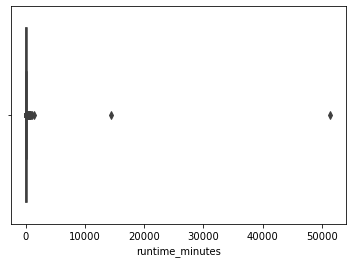

In [19]:
sns.boxplot(data=df, x=df['runtime_minutes'])

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

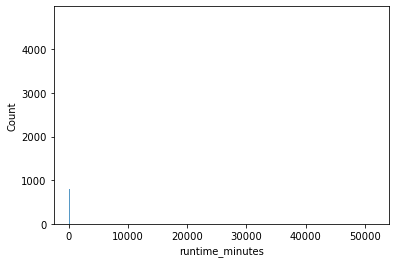

In [20]:
sns.histplot(data=df, x=df['runtime_minutes'])

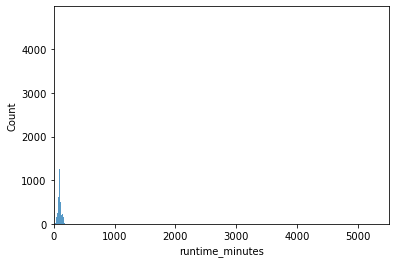

In [21]:
sns.histplot(data=df, x=df['runtime_minutes'])
plt.xlim(0,5500);

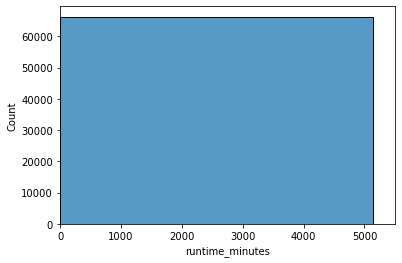

In [22]:
sns.histplot(data=df, x=df['runtime_minutes'], bins=10)
plt.xlim(0,5500);

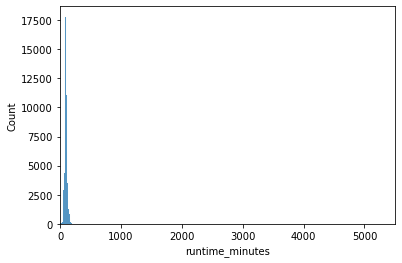

In [23]:
sns.histplot(data=df, x=df['runtime_minutes'], bins=5000)
plt.xlim(0,5500);

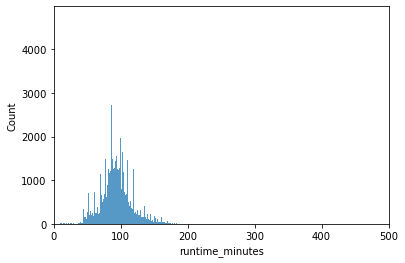

In [24]:
sns.histplot(data=df, x=df['runtime_minutes'])
plt.xlim(0,500);

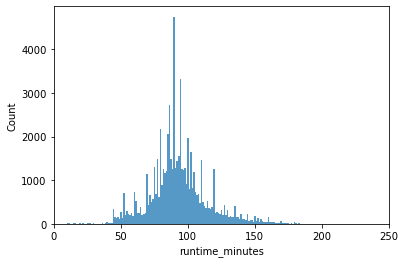

In [25]:
sns.histplot(data=df, x=df['runtime_minutes'])
plt.xlim(0,250);

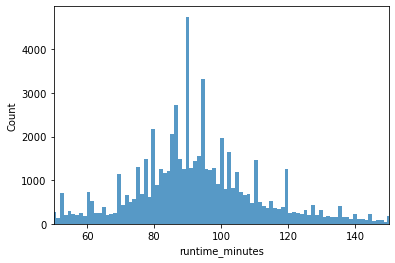

In [26]:
sns.histplot(data=df, x=df['runtime_minutes'])
plt.xlim(50,150);

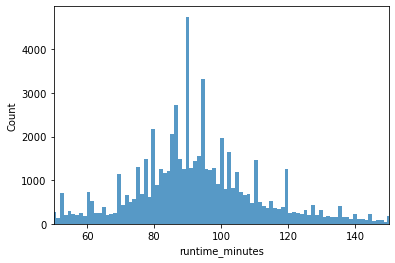

In [27]:
sns.histplot(data=df, x=df['runtime_minutes'])
plt.xlim(50,150);

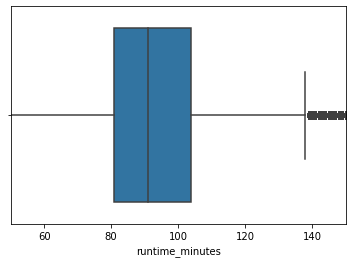

In [28]:
sns.boxplot(data=df, x=df['runtime_minutes'])
plt.xlim(50,150);

A clean dataframe (called new_df) that captures runtime as a subset of the previuos data

In [29]:
df_new = df[(df["runtime_minutes"] >=50.0) & (df["runtime_minutes"] <=150.0)]

In [30]:
df_new.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [31]:
df_new.isna().sum()


movie_id             0
averagerating        0
numvotes             0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             473
dtype: int64

In [32]:
df1 = df_new.dropna()
df1

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,tt9768966,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


In [33]:
df1['genres']

0                         Romance
1                     Documentary
2                           Drama
3        Action,Adventure,Fantasy
4                Mystery,Thriller
                   ...           
73849                 Documentary
73851                 Documentary
73852     Action,Animation,Sci-Fi
73854                 Documentary
73855                    Thriller
Name: genres, Length: 63169, dtype: object

In [34]:
#i = 0
#for g in df1['genres']:
    #for h in g:
        #if h == ',':
            #g = g.replace(h, ' ')
        #df1['genres'][i] = g
    #i += 1

In [35]:
df1.isna().sum()

movie_id           0
averagerating      0
numvotes           0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

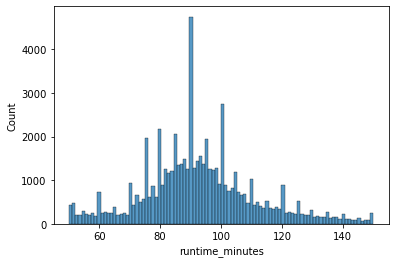

In [36]:
sns.histplot(data=df_new, x=df_new['runtime_minutes'])

<AxesSubplot:xlabel='runtime_minutes'>

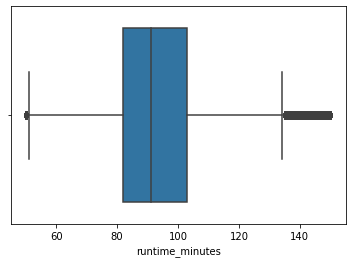

In [37]:
sns.boxplot(data=df_new, x=df_new['runtime_minutes'])

In [38]:
df1.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,63169.000000,6.316900e+04,63169.000000,63169.000000
mean,6.296394,3.858797e+03,2014.263563,92.994760
std,1.453177,3.033728e+04,2.599151,18.834661
min,1.000000,5.000000e+00,2010.000000,50.000000
25%,5.400000,1.600000e+01,2012.000000,82.000000
50%,6.400000,6.400000e+01,2014.000000,91.000000
75%,7.300000,3.540000e+02,2016.000000,103.000000
max,10.000000,1.841066e+06,2019.000000,150.000000


*******************************************************************************************************************************

Recommendation: Focus on either short films (movies that are 55 minutes, including the credits) 
                or on long films (movies that are about 125 minutes)

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

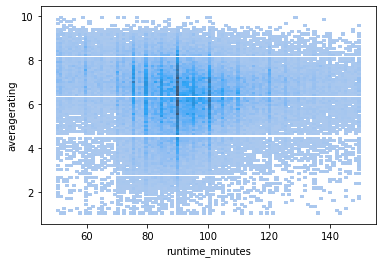

In [39]:
sns.histplot(data=df_new, x=df_new['runtime_minutes'], y=df_new['averagerating'])

In [40]:
#Thoughts: Can I find correlation between time of 80 minutes to 100? Perharps no correlation because other factors 
# are influencing that low rating such as movie quality, release location, etc

However, according to statista, 45% of American adults say movies should be about 91 to 120 minutes long. We tested this hypothesis below:

Ho: The mean runtime for a box office movie is 120 minutes, mu = 120

Ha: The mean runtime for a box office movie is not 120 minutes, mu =! 120

This is a two-tailed test. Although the population sample size is more than 30, we do not know the population standard deviation thus the t-test is appropraite for this hypothesis. 

We know the sample mean runtime is 92.93 minutes, i.e; x_bar = 92.99
The sample size is 63,169
The sample standard deviation is 18.83

In [41]:
x_bar = 92.99
MUo = 120
n = 63169
s = 18.83
alpha = 0.05 
df = n-1

import numpy as np
import scipy.stats as stats


In [42]:
t = (x_bar - MUo)/(s/np.sqrt(n))
t

-360.51742884592

In [43]:
p_value = stats.t.sf(t, df)
p_value

1.0

The p_value of 1 is greater than alpha of 0.05, this means we fail to reject the null hypothesis because we do not have enough evidence to reject the assumed hypotheisis that the mean runtime for a movie in box office is 120 muntes. 

******************************************************************************************************************************

In [44]:
# Working on other datasets

In [45]:
Recommendation: 

Majority of movies cost between 10 million and 150 million. We recommend budgetting about 200M to per movie to stand out  

SyntaxError: invalid syntax (<ipython-input-45-7ddabfac44d6>, line 1)

In [ ]:
movie_budget = pd.read_csv("Datasets/movie_budgets_clean.csv")
movie_budget

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=movie_budget, x=movie_budget["production_budget"])
#This shows that most movies are within the budget of 10M AND 100M 

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=movie_budget, x=movie_budget["production_budget"], y=movie_budget["domestic_gross"]);
#sns.histplot(data=movie_budget, x=movie_budget["production_budget"], y=movie_budget["foreign_gross"]);

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

sns.scatterplot(data=movie_budget, x=movie_budget["production_budget"], y=movie_budget["foreign_gross"]);

In [ ]:
mb["production_budget"].describe()

In [ ]:
sns.boxplot(data=mb, x=mb["production_budget"])

In [ ]:

sns.histplot(data=mb, x=mb['production_budget'], y=mb['domestic_profit']);

